<a href="https://colab.research.google.com/github/dscohen75/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
def mymean(a):
  # takes a list or array of numeric values and returns their average
  
  total = 0
  for x in a:
    total += x

  mean = total/ len(a)

  return mean



In [ ]:
import numpy as np

In [ ]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

sales

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [ ]:
mymean(sales)

3052.714285714286

In [ ]:
np.mean(sales)

3052.714285714286

## The mean of sales is 3052.71

In [ ]:
def myvariance(a):
  # takes a list or array of numeric values and returns the sample variance
  sum_sq_dev = 0

  for x in a:
    sq_dev = (x - mymean(a))**2
    sum_sq_dev += sq_dev

  variance = sum_sq_dev / (len(a) -1)

  return variance

In [ ]:
myvariance(sales)

214387.90476190473

In [ ]:
np.var(sales, ddof =1)

214387.90476190473

## The variance of sales is 214387.90

In [ ]:
import math

def mystd(a):
  # Takes a list or array of numeric values and returns the sample standard deviation

  std_dev = math.sqrt(myvariance(a))

  return std_dev

In [ ]:
std_sales = mystd(sales)

In [ ]:
np.std(sales, ddof=1)

463.0204150595357

## The standard deviation of sales is 463.02

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])

In [ ]:
sales_cust_cov = np.cov(sales, customers)
sales_cust_cov

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## The covariance between sales and the number of customers entering the store is 7604.36

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
std_cust = mystd(customers)
std_cust

17.057326313123664

In [ ]:
def mycorr(a,b):
  # Takes two lists or arrays of numeric values, and returns the Pearson correlation coefficient.
  
  covar = np.cov(a,b)[0][1]
  r = covar/ (mystd(a)*mystd(b))
  
  return r


In [ ]:
mycorr(customers, sales)

0.9628339778148909

## r = 0.96 for sales and the number of customers entering the store.

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(titanic.shape)
titanic.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [ ]:
titanic = titanic.drop('Unnamed: 0', axis=1)

In [ ]:
titanic.describe()


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [ ]:
titanic['pclass'].value_counts()


3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [ ]:
titanic['parch'].value_counts()

0.0    1002
1.0     170
2.0     113
3.0       8
5.0       6
4.0       6
9.0       2
6.0       2
Name: parch, dtype: int64

In [ ]:
titanic['has_cabin_number'].value_counts()

0    1015
1     295
Name: has_cabin_number, dtype: int64

In [ ]:
titanic['sibsp'].value_counts()

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

In [ ]:
# Select just those colums that are continuous variables
titanic_cont = titanic[['age', 'parch', 'fare', 'body']].copy()

In [ ]:
# Alternate way
titanic_cont = pd.DataFrame({'age': titanic['age'], 'parch': titanic['parch'], 'fare': titanic['fare'],'body': titanic['body']})

In [ ]:
titanic_cont.shape

(1310, 4)

In [ ]:
titanic_cont.head()

,age,parch,fare,body
0,29.0000,0.0,211.3375,NaN
1,0.9167,2.0,151.5500,NaN
2,2.0000,2.0,151.5500,NaN
3,30.0000,2.0,151.5500,135.0
4,25.0000,2.0,151.5500,NaN


In [ ]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [ ]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
import matplotlib.pyplot as plt

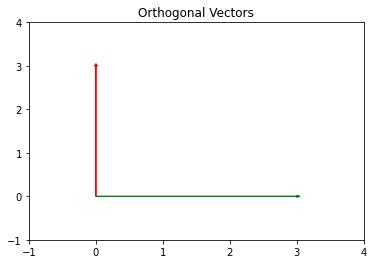

In [ ]:
v1 = [0, 3]
v2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, v1[0], v1[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1], head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

## Orthogonal is the same as perpendicular.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
a = np.array([-5, 3, 7])
a

array([-5,  3,  7])

In [ ]:
b = np.array([6, -8, 2])
b

array([ 6, -8,  2])

In [ ]:
np.vdot(a,b)

-40

## a and b are not orthogonal, because their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = np.array([2, -15, 6, 20])

In [ ]:
(np.linalg.norm(c))**2

665.0

In [ ]:
np.vdot(c,c)

665

In [ ]:
np.matmul((c.T),c)

665

## All three of these happen to be calculated the same way. in the case of a vector, which is the same as a n x 1 matrix, the transpose of that vector times the vector is the same as the dot product of the vector with itself, which is the same as the square of the norm.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
f = np.array([4, 12, 11, 9, 2])

In [ ]:
## Divide f by its norm to turn in into the unit vector f_hat

f_hat = f/ np.linalg.norm(f)

f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

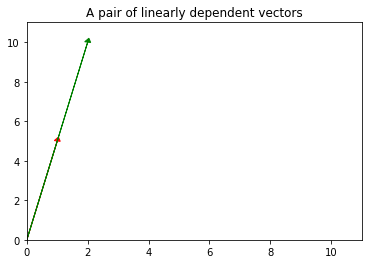

In [ ]:
# Two linearly dependent vectors

v3 = [1, 5]
v4 = [2, 10]

plt.arrow(0,0, v3[0], v3[1], head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v4[0], v4[1], head_width=.2, head_length=0.2, color ='green')
plt.xlim(0,11)          
plt.ylim(0,11)
plt.title("A pair of linearly dependent vectors")
plt.show()

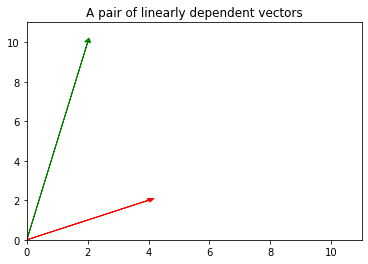

In [ ]:
# Two linearly independent vectors

v3 = [4, 2]
v4 = [2, 10]

plt.arrow(0,0, v3[0], v3[1], head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v4[0], v4[1], head_width=.2, head_length=0.2, color ='green')
plt.xlim(0,11)          
plt.ylim(0,11)
plt.title("A pair of linearly dependent vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## The span of g and h is the line that is defined by either one of them, as they are linearly dependent. (h = 4g)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
matrix = np.array([[1,2,3],
                   [-1,0,7],
                   [4,8,2]])
matrix

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [ ]:
np.linalg.matrix_rank(matrix)

3

## The span of l, m, and n is all of 3d space, since the rank of the matrix formed by these columns is 3.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



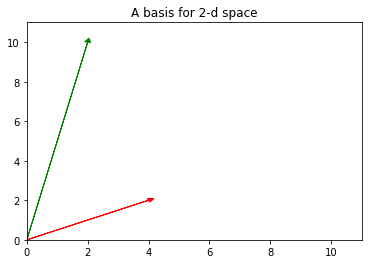

In [ ]:
v3 = [4, 2]
v4 = [2, 10]

plt.arrow(0,0, v3[0], v3[1], head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v4[0], v4[1], head_width=.2, head_length=0.2, color ='green')
plt.xlim(0,11)          
plt.ylim(0,11)
plt.title("A basis for 2-d space")
plt.show()

## 6.2 What does it mean to form a basis?

## A set of vectors forms a basis for a space if they are linearly independent and span that space.
## You can generate any vector in that space by taking a linear combination of the basis vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## This is equal to our matrix formed by vectors l, m, and n above. 
## The rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

## The rank of a matrix tells us whether any of the rows are linearly dependent. For a square matrix, this is the same as whether any of the columns are linearly dependent. 
(I didn't quite understand how we'll deal with this when it comes to non-square dataframes.)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
import numpy as np

v = np.array([1,3])
w = np.array([-1,2])

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}


In [ ]:
np.vdot(v,v)

10

In [ ]:
(np.linalg.norm(v))**2

10.000000000000002

In [ ]:
project = (np.vdot(w,v)/np.vdot(v,v))*v
project 

array([0.5, 1.5])

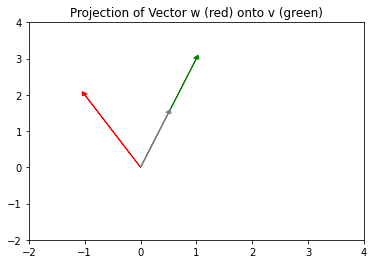

In [ ]:
import matplotlib.pyplot as plt

plt.arrow(0,0, w[0], w[1], head_width=0.1, head_length=0.1, color='red')
plt.arrow(0,0, v[0], v[1], head_width=0.1, head_length=0.1, color='green')
plt.arrow(0,0, project[0], project[1], head_width=0.1, head_length=0.1, color='gray')
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.title("Projection of Vector w (red) onto v (green)")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

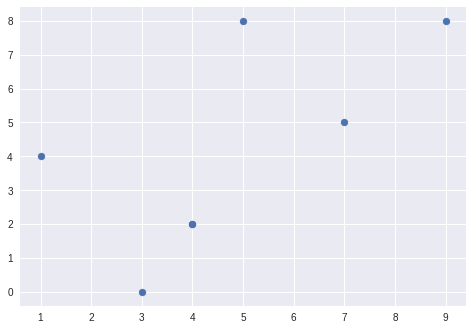

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()